# Data Exploration

Importing Modules

In [1]:
#%pip install pandas-profiling
#import pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.DataFrame()

""


# Load data as dataframe and data overview

In [3]:
df = pd.read_csv('predictive_maintenance_dataset.csv')

In [4]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
#pandas_profiling.ProfileReport(df)

Identiyfing Number of Missing Values

In [7]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

Checking Imbalance in the Dataset

In [8]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

Checking the duplicate columns in the data set

In [9]:
df.duplicated().sum()

1

Identifying the unique number of total devices and failure devices in the dataset

In [10]:
total_devices = len(df.device.unique())
print('There are {} total devices'.format(total_devices))

total_failure_devices = len(df[df.failure == 1].device.unique())
print('There are {} total failure devices'.format(total_failure_devices))

There are 1169 total devices
There are 106 total failure devices


In [11]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

# Summary
This dataset is clean, no missing values. All attributes are integer data type.

It is imbalanced data set, as the failuer class is about 0.1% of unfailure class.Here oversampling approach is used to deal with imbalanced dataset.

metric 7 and 8 seems like exactly same to each other, we can drop one of them.

Some attributes have limited number of distictive values, very sparse, indicating that they are likely to be categorical variable, such as metric3, 5,7,9.


metric 2,3,4,7,9 are highly skewed.

metric differ in their magnitudes. Scaling or centering is requried

# Data Engineering

'Date' Exploration

Creating features based on date

Splitting the date column in Month and Weekdays

Also, Calculating the active days of all the devices considering 2015-01-01 as the minimum or starting date

In [12]:
df.date = pd.to_datetime(df.date)

df['activedays']=df.date-df.date[0]

df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7


Grouping the unique device numbers in Months

In [13]:
df.groupby('month').agg({'device':lambda x: x.nunique()})

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


# Data visualization in date

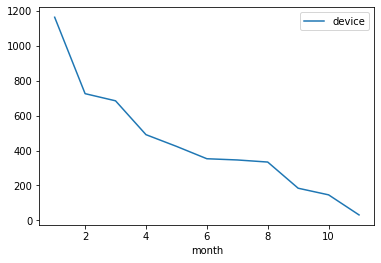

In [14]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()


This figure shows that as time move on, the number of devices are getting less and less.

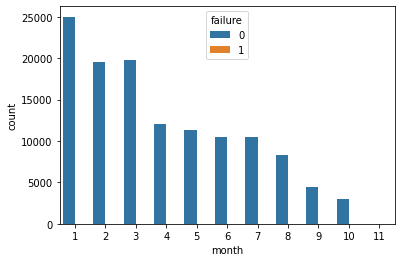

In [15]:

ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

This figure shows most of the devices failed in the first month.

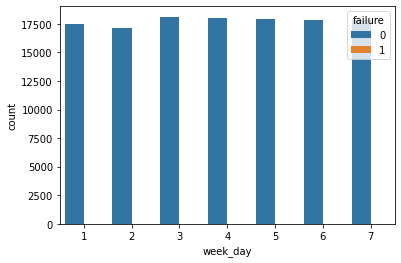

In [16]:
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

This figure shows that there is no device fails on Saturday. Maybe they don't work on the this day.

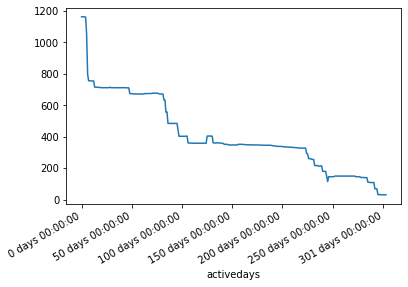

In [17]:
df.groupby('activedays')['device'].count().plot()
plt.show()

One can see that the number of devices decreases as time goes by. And there is a big jump in the middle of activedays. Those may be some devices got put back in after they failed and fixed well. We will investigate the detail later.

In [18]:
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

All of these data are collected between 11/02/2015 and 01/01/2015

# Devices come back to use

In [19]:
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_date']=df.device.map(df_date.date.to_dict())

df



,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7,2015-11-02


In [20]:
dff=df[(df.failure==1)&(df.date!=df.max_date)]

dff

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


Max date means the last day the device got checked. If the max day is ahead of failure date, it means this device returned to use after failed because got fixed.

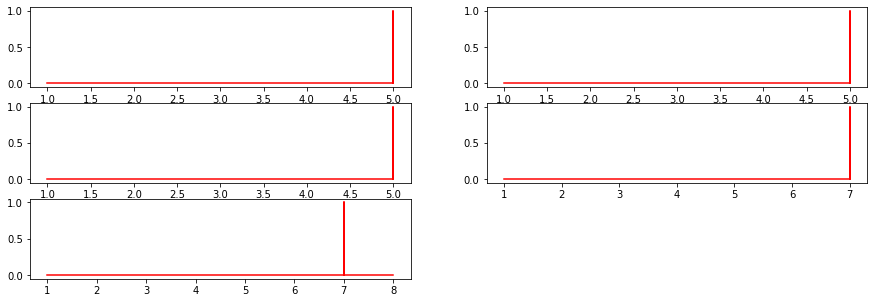

In [21]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(3, 2, 1) 
plt.plot(df.loc[df['device']=='S1F136J0',['failure','month']]['month'],df.loc[df['device']=='S1F136J0',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 2) 
plt.plot(df.loc[df['device']=='W1F0KCP2',['failure','month']]['month'],df.loc[df['device']=='W1F0KCP2',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 3)
plt.plot(df.loc[df['device']=='W1F0M35B',['failure','month']]['month'],df.loc[df['device']=='W1F0M35B',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 4)
plt.plot(df.loc[df['device']=='S1F0GPFZ',['failure','month']]['month'],df.loc[df['device']=='S1F0GPFZ',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 5)
plt.plot(df.loc[df['device']=='W1F11ZG9',['failure','month']]['month'],df.loc[df['device']=='W1F11ZG9',\
         ['failure','month']]['failure'],\
         color = 'red')

plt.show()

# Reduce dataset with Unique Device ID

In [22]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24


In [23]:
df.metric1.nunique()

123877

In [24]:
df1 = df.groupby('device').agg({'date':max})

In [25]:
df1.shape

(1169, 1)

In [26]:
df1

,date
device,
S1F01085,2015-01-06
S1F013BB,2015-05-11
S1F0166B,2015-01-06
S1F01E6Y,2015-02-17
S1F01JE0,2015-01-06
...,...
Z1F1VMZB,2015-10-19
Z1F1VQFY,2015-06-30
Z1F26YZB,2015-03-25


In [27]:
df1=df1.reset_index()

df=df.reset_index(drop=True) 

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.shape

(1169, 16)

In [28]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25


# Create feature called 'failure_before'

If we just take the last record for the devices, we may lose information from those come back after failed ones

In [1]:
df2['failure_before']=0

NameError: name 'df2' is not defined

In [30]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0


In [31]:
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

# Redefine device ID Value

In [32]:
df2.device

0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [33]:
Id = df2.device.values.tolist()

Changing device ID for first four characters

In [34]:
Id1 = [] 
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device=Id1

df2.device.value_counts()

S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: device, dtype: int64

In [35]:
dev=pd.crosstab(df2['device'],df2['failure']) 

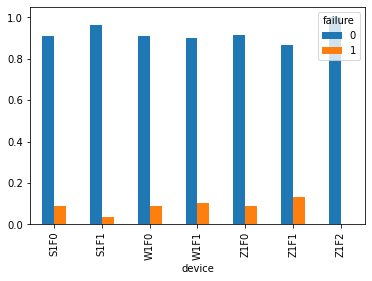

In [36]:
dev.div(dev.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()

From the Barplot we can say that Devices ID which begins with ZIF1 fails the most, then W1F1 second

# Data Transformation

In [37]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19,0
1165,Z1F1,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30,0
1166,Z1F2,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25,0
1167,Z1F2,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25,0


In [38]:
df2.nunique()

device               7
date               104
failure              2
metric1           1168
metric2            118
metric3             44
metric4             67
metric5             58
metric6           1135
metric7             22
metric8             22
metric9             64
activedays         104
month               11
week_day             7
max_date           104
failure_before       2
dtype: int64

As metric 3, 4, 5, 7, 9 are very small we shall convert this as a categorical data

In [39]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9'] 
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   device          1169 non-null   object         
 1   date            1169 non-null   datetime64[ns] 
 2   failure         1169 non-null   int64          
 3   metric1         1169 non-null   int64          
 4   metric2         1169 non-null   int64          
 5   metric3         1169 non-null   object         
 6   metric4         1169 non-null   object         
 7   metric5         1169 non-null   object         
 8   metric6         1169 non-null   int64          
 9   metric7         1169 non-null   object         
 10  metric8         1169 non-null   int64          
 11  metric9         1169 non-null   object         
 12  activedays      1169 non-null   timedelta64[ns]
 13  month           1169 non-null   int64          
 14  week_day        1169 non-null   int64   

Now, Converting the activedays datatype to numerical datatype

In [41]:
def str_to_num(str):
    return str.split(' ')[0]

df2.activedays = df2.activedays.astype('str')

df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int64         
 14  week_day        1169 non-null   int64         
 15  max_

Also, Converting month and week_days in categorical data

In [42]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

# Data Standardization

In [44]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5,1,1,2015-01-06,0


Data Normalization

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


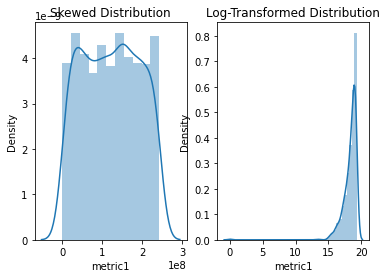

In [45]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric1'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


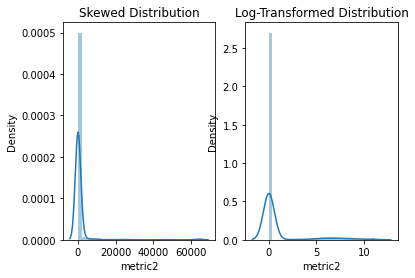

In [46]:
f, axarr = plt.subplots(1,2) 

sns.distplot(df2['metric2'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric2']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


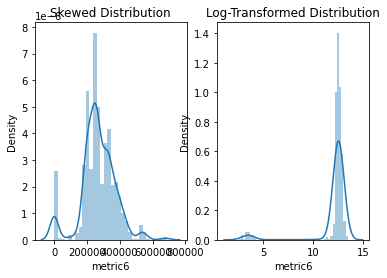

In [47]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric6'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric6']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

Data Standardization

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs =['metric1','metric2','metric6'] 
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   float64       
 4   metric2         1169 non-null   float64       
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   float64       
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

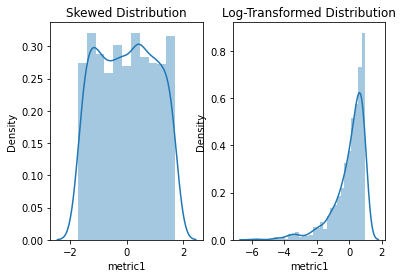

In [49]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['metric1'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1]) 
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

Here, we see that metric1, metric2 and metric6 are scaled.

# Drop Unimportant and Redundant Features

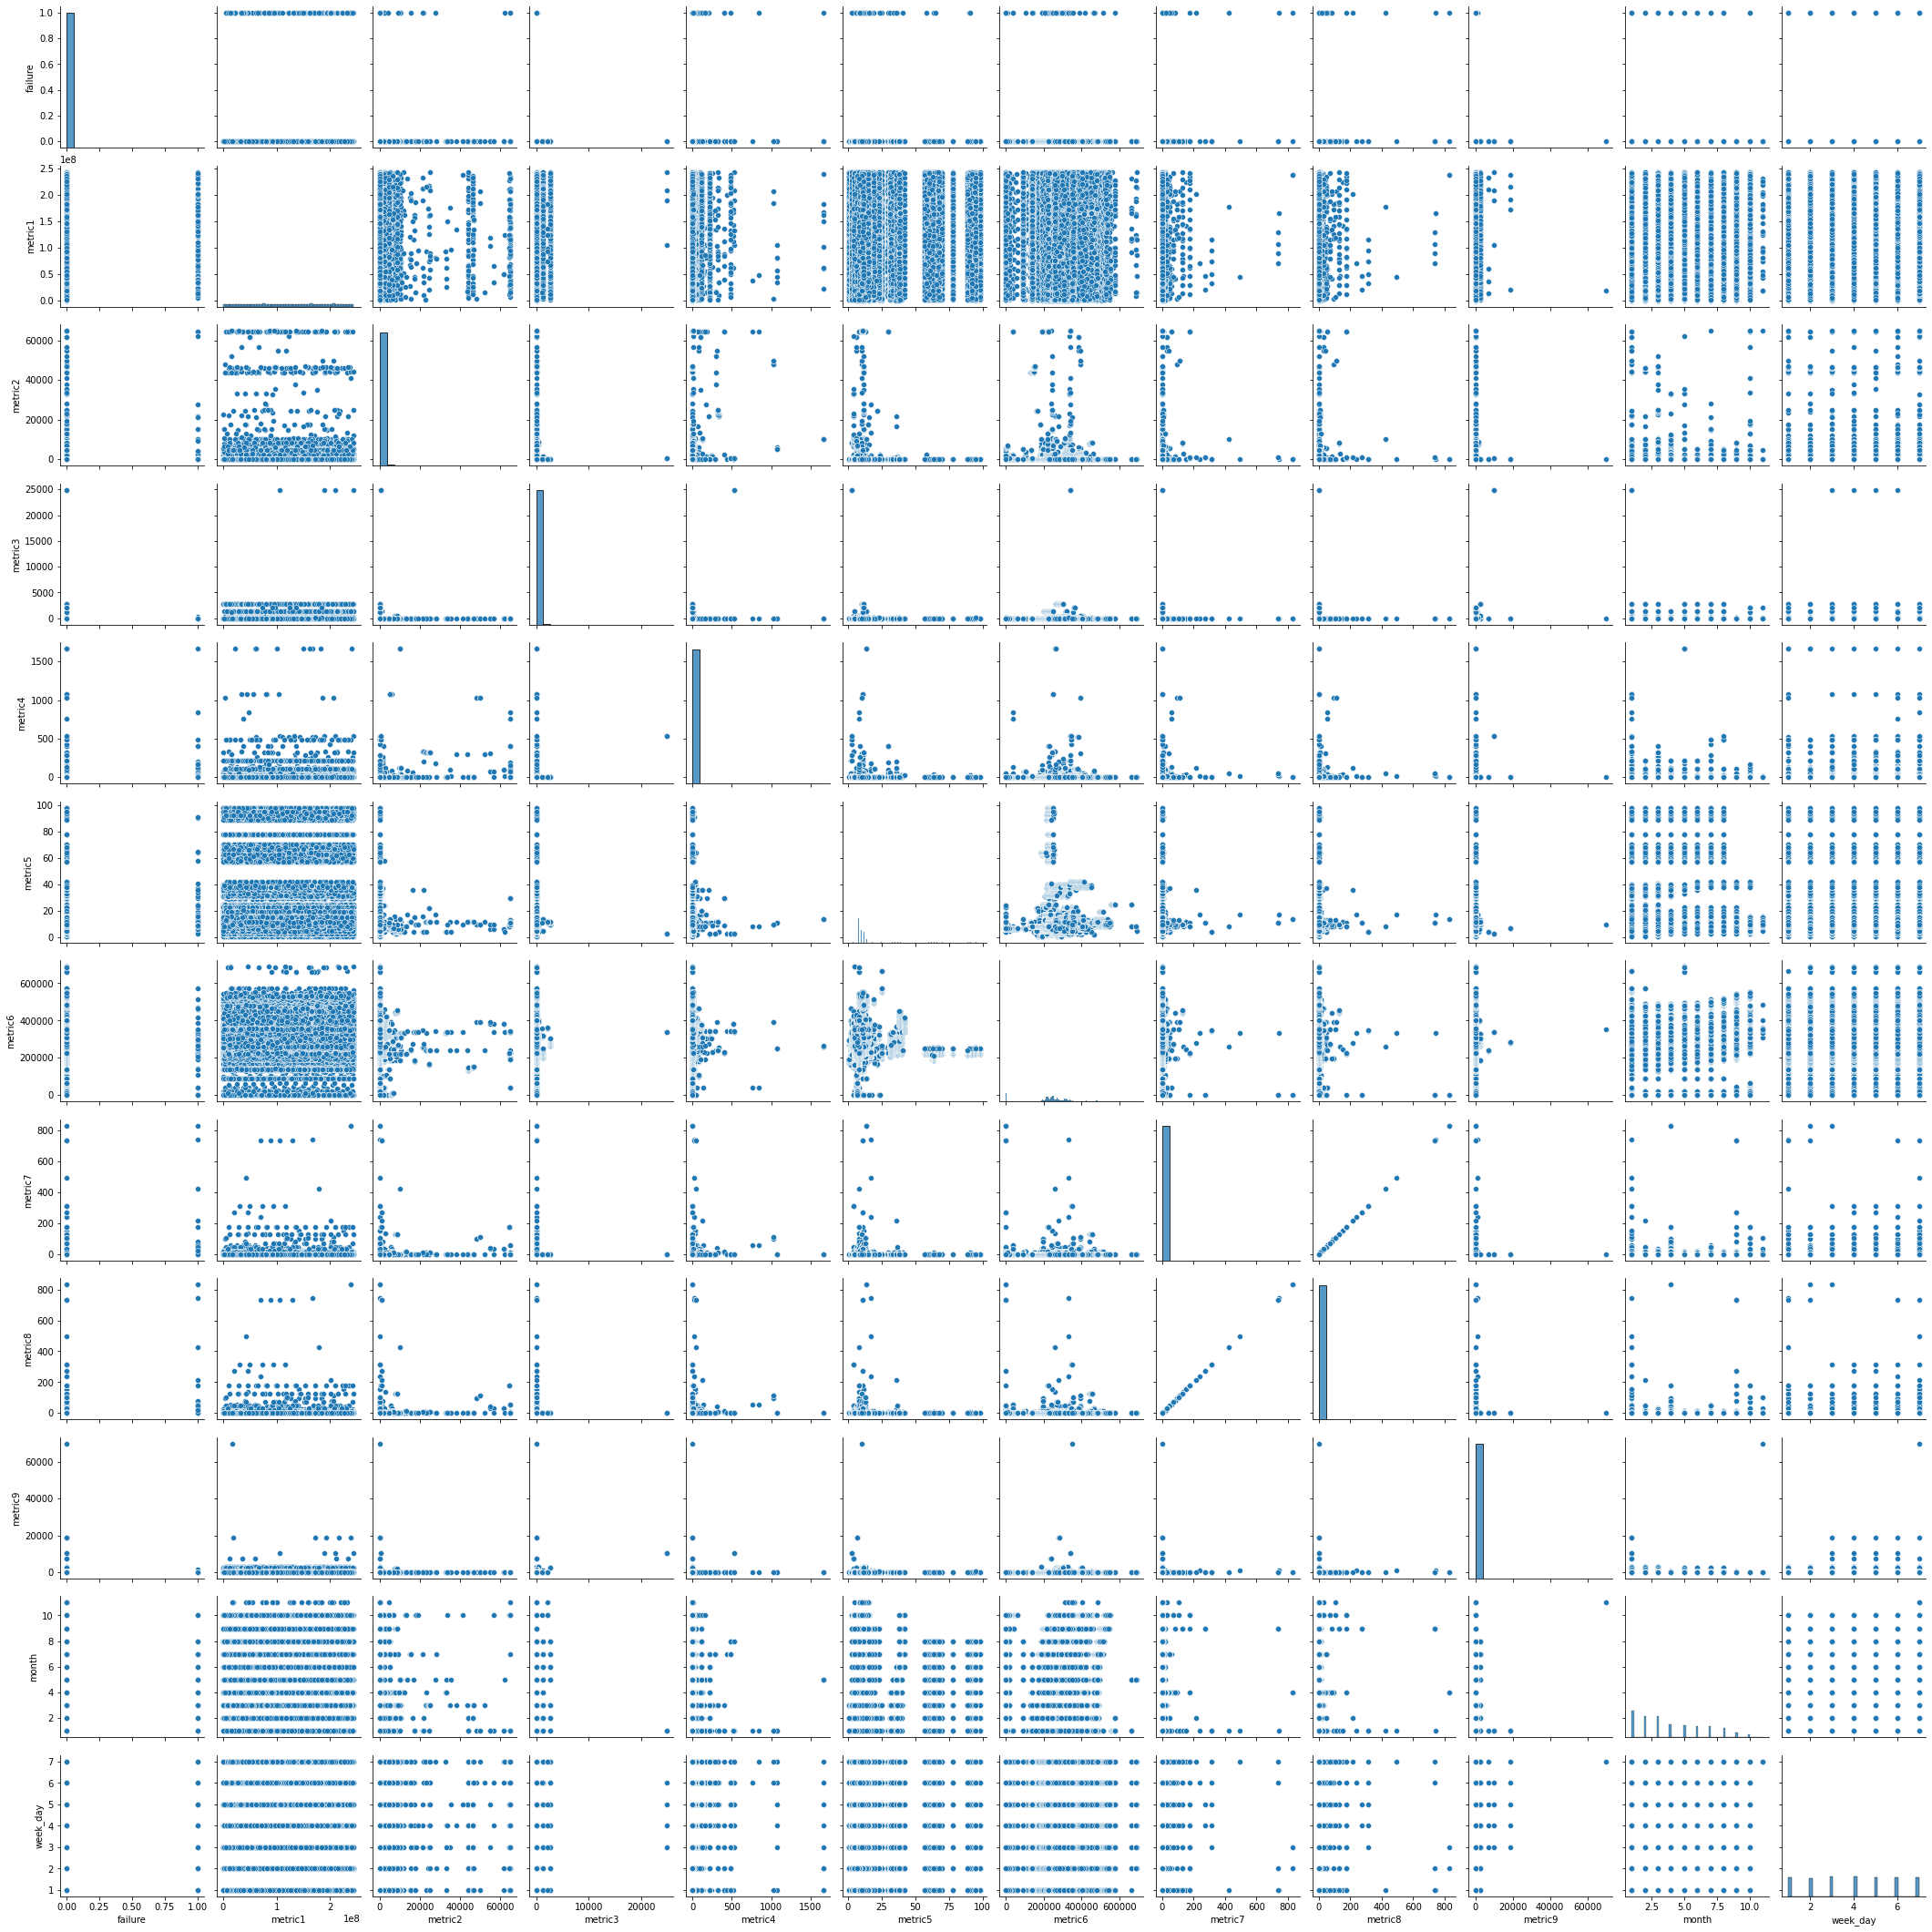

In [50]:
sns.pairplot(df)
plt.show()

It is obvious that metric7 and metric8 is highly linear related or equal to each other

In [51]:
(df['metric7']==df['metric8']).value_counts()

True    124494
dtype: int64

Thus, dropping metric8 column from the dataset

In [52]:
df.drop('metric8',axis=1,inplace=True)

In [53]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3,2015-08-24


In [54]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,2015-01-06,0


In [55]:
df2.drop(['date','max_date'],axis=1,inplace=True)

In [56]:
df2.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,failure_before
0,S1F0,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,0
1,S1F0,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,0
2,S1F0,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,0
3,S1F0,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,0
4,S1F0,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   device          1169 non-null   object 
 1   failure         1169 non-null   int64  
 2   metric1         1169 non-null   float64
 3   metric2         1169 non-null   float64
 4   metric3         1169 non-null   object 
 5   metric4         1169 non-null   object 
 6   metric5         1169 non-null   object 
 7   metric6         1169 non-null   float64
 8   metric7         1169 non-null   object 
 9   metric8         1169 non-null   int64  
 10  metric9         1169 non-null   object 
 11  activedays      1169 non-null   int32  
 12  month           1169 non-null   object 
 13  week_day        1169 non-null   object 
 14  failure_before  1169 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 141.6+ KB


Now, creating dummies of categorical datatype

In [58]:
df2 = pd.get_dummies(df2,drop_first=True)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [59]:
df2.head()

,failure,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0,0.094795,-0.136309,1.333502,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.092146,-0.145660,4.008798,0,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,-1.630184,-0.145660,1.289341,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.357937,-0.145660,-0.100105,0,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.898989,-0.145660,1.359772,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df2.shape

(1169, 279)

In [61]:
df2.failure.value_counts()

0    1068
1     101
Name: failure, dtype: int64

# Feature Selection

# Defining dependent and independent values

In [62]:
X = df2.drop('failure',axis=1)
Y = df2.failure

In [63]:
X

,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,device_Z1F0,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0.094795,-0.136309,1.333502,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.092146,-0.145660,4.008798,0,130,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.630184,-0.145660,1.289341,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.357937,-0.145660,-0.100105,0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.898989,-0.145660,1.359772,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,-0.358265,-0.145660,-0.061700,0,291,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1165,0.794211,-0.145660,-0.044401,0,180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166,1.519129,-0.145660,0.211274,0,83,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1167,-0.702603,-0.145660,-0.736728,0,83,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

In [65]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X,Y)

features = pd.DataFrame()
features['feature']= X.columns
features['important']=clf.feature_importances_
features.sort_values(by=['important'], ascending=False,inplace=True)
features.set_index('feature', inplace=True)
features.iloc[:20,:].plot(kind='barh', figsize=(30,30))

plt.show()"""

"from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.ensemble import RandomForestClassifier\n\nclf = RandomForestClassifier(n_estimators=50, max_features='auto')\nclf= clf.fit(X,Y)\n\nfeatures = pd.DataFrame()\nfeatures['feature']= X.columns\nfeatures['important']=clf.feature_importances_\nfeatures.sort_values(by=['important'], ascending=False,inplace=True)\nfeatures.set_index('feature', inplace=True)\nfeatures.iloc[:20,:].plot(kind='barh', figsize=(30,30))\n\nplt.show()"

In [66]:
"""from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf,prefit=True)
x_reduced = model.transform(X)
print (x_reduced.shape)"""

'from sklearn.feature_selection import SelectFromModel\n\nmodel = SelectFromModel(clf,prefit=True)\nx_reduced = model.transform(X)\nprint (x_reduced.shape)'

In [67]:
#x_reduced=pd.DataFrame(x_reduced)

In [68]:
#x_reduced.head()

Data Extraction to CSV :

In [69]:
data = X
data['failure'] = Y
data.to_csv("data.csv",sep=",",index=False)

Applying PCA to reduce the number of features :

In [71]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

pca = PCA(50)
Xpca= pca.fit_transform(X.values)
Xpca = pd.DataFrame(Xpca,index=X.index,columns=[f"P{i}" for i in range(1,51)])
print(Xpca.head())

X= Xpca

           P1        P2        P3        P4        P5        P6        P7  \
0 -107.058090 -4.477129  0.642663 -0.990335  0.921082 -0.230037 -0.204759   
1   17.947065 -4.444704  2.069810 -2.405071  2.385642  0.390999 -0.203290   
2 -107.057669 -4.479372  1.931136 -1.007061 -0.225248 -0.228978 -0.198818   
3  -65.060883 -4.462142 -0.316743 -0.126510  0.169357 -0.102211 -0.183884   
4 -107.058264 -4.476083  0.039856 -0.998502  1.454355 -0.221594 -0.214047   

         P8        P9       P10  ...       P41       P42       P43       P44  \
0  0.168462  0.228289  0.028964  ... -0.019904 -0.064342 -0.103227 -0.051181   
1 -0.196203  0.211144 -0.040237  ...  0.065974 -0.047531 -0.131106 -0.108363   
2  0.205420  0.212079  0.039181  ... -0.032345 -0.024880 -0.080586  0.095724   
3  0.065239 -0.006349  0.015142  ...  0.001769 -0.066436 -0.013054 -0.043826   
4  0.153082  0.232617  0.021769  ... -0.029848 -0.045803 -0.073320 -0.010350   

        P45       P46       P47       P48       P49     

# Model Training

# TWIN SVM

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from TVSVM import TwinSVMClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [73]:
h = .02  # step size in the mesh
params3 = {'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 1, 'C2': 1,'kernel_type':3,'kernel_param': 3,'fuzzy' :0}

names = "Twin SVM with RBF Kernel"
classifier = TwinSVMClassifier(**params3)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

clf = OneVsOneClassifier(classifier).fit(X_train, y_train) # or OneVsRestClassifier
score = clf.score(X_test, y_test)
print(score)


0.9601139601139601
